In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuração inicial
BASE_DIR = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_DIR = BASE_DIR / "data" / "processed_refined"

# Carrega dataset refinado
df = pd.read_csv(DATA_DIR / "brasileirao_refinado.csv")

# Normaliza nomes de times
df["time_mandante"] = df["time_mandante"].str.strip()
df["time_visitante"] = df["time_visitante"].str.strip()

print("Dataset pronto:", df.shape)
df.head()


Dataset pronto: (8453, 41)


,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,resultado,pontos_mandante,pontos_visitante,mandante_venceu,visitante_venceu,empate_flag
0,2003,2003-05-04,1,Estádio Brinco de Ouro da Princesa,NaN,NaN,NaN,Guarani,Vasco da Gama,NaN,...,0.0,0.0,0.0,0.0,mandante,3,0,1,0,0
1,2003,2003-05-04,1,Estádio Governador Magalhães Pinto,NaN,NaN,NaN,Cruzeiro,São Caetano,NaN,...,0.0,0.0,0.0,0.0,empate,1,1,0,0,1
2,2003,2003-05-04,1,Estádio Jornalista Mário Filho,NaN,NaN,NaN,Flamengo,Coritiba FC,NaN,...,0.0,0.0,0.0,0.0,empate,1,1,0,0,1
3,2003,2003-05-04,1,Estádio Governador Plácido Castelo,NaN,NaN,NaN,Fortaleza,EC Bahia,NaN,...,0.0,0.0,0.0,0.0,empate,1,1,0,0,1
4,2003,2003-05-04,1,Estádio de Hailé Pinheiro,NaN,NaN,NaN,Goiás EC,Paysandu SC,NaN,...,0.0,0.0,0.0,0.0,empate,1,1,0,0,1


In [2]:
def comparar_times(time_a, time_b):
    """
    Compara dois times com base nas partidas registradas.
    """

    partidas = df[
        (df["time_mandante"].isin([time_a, time_b])) |
        (df["time_visitante"].isin([time_a, time_b]))
    ]

    # Estatísticas básicas
    gols_marcados = {
        time_a: ((partidas["time_mandante"] == time_a) * partidas["gols_mandante"] +
                 (partidas["time_visitante"] == time_a) * partidas["gols_visitante"]).sum(),
        time_b: ((partidas["time_mandante"] == time_b) * partidas["gols_mandante"] +
                 (partidas["time_visitante"] == time_b) * partidas["gols_visitante"]).sum(),
    }

    vitorias = {
        time_a: ((partidas["time_mandante"] == time_a) & (partidas["mandante_venceu"] == 1)).sum() +
                 ((partidas["time_visitante"] == time_a) & (partidas["visitante_venceu"] == 1)).sum(),
        time_b: ((partidas["time_mandante"] == time_b) & (partidas["mandante_venceu"] == 1)).sum() +
                 ((partidas["time_visitante"] == time_b) & (partidas["visitante_venceu"] == 1)).sum(),
    }

    empates = partidas["empate_flag"].sum()

    print(f"\n=== COMPARAÇÃO {time_a} x {time_b} ===")
    print(f"Gols marcados: {gols_marcados}")
    print(f"Vitórias: {vitorias}")
    print(f"Empates totais: {empates}")

    # Gráfico comparativo
    dados_plot = pd.DataFrame({
        "Time": [time_a, time_b],
        "Vitórias": [vitorias[time_a], vitorias[time_b]],
        "Gols Marcados": [gols_marcados[time_a], gols_marcados[time_b]]
    })

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.barplot(data=dados_plot, x="Time", y="Vitórias", ax=ax[0], palette="Greens_d")
    sns.barplot(data=dados_plot, x="Time", y="Gols Marcados", ax=ax[1], palette="Blues_d")

    ax[0].set_title("Vitórias Totais")
    ax[1].set_title("Gols Marcados Totais")
    plt.show()



=== COMPARAÇÃO Flamengo x Palmeiras ===
Gols marcados: {'Flamengo': np.float64(1182.0), 'Palmeiras': np.float64(1103.0)}
Vitórias: {'Flamengo': np.int64(358), 'Palmeiras': np.int64(339)}
Empates totais: 401


/var/folders/84/jsc3gvgn34ldvx7brqhwlxwc0000gp/T/ipykernel_94635/4072906504.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_plot, x="Time", y="Vitórias", ax=ax[0], palette="Greens_d")
/var/folders/84/jsc3gvgn34ldvx7brqhwlxwc0000gp/T/ipykernel_94635/4072906504.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_plot, x="Time", y="Gols Marcados", ax=ax[1], palette="Blues_d")


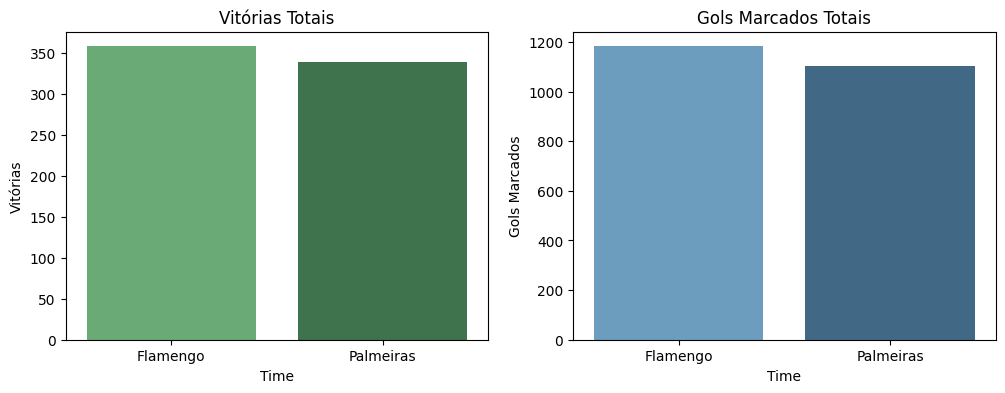


=== COMPARAÇÃO Corinthians x São Paulo ===
Gols marcados: {'Corinthians': np.float64(1004.0), 'São Paulo': np.float64(1167.0)}
Vitórias: {'Corinthians': np.int64(325), 'São Paulo': np.int64(369)}
Empates totais: 448


/var/folders/84/jsc3gvgn34ldvx7brqhwlxwc0000gp/T/ipykernel_94635/4072906504.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_plot, x="Time", y="Vitórias", ax=ax[0], palette="Greens_d")
/var/folders/84/jsc3gvgn34ldvx7brqhwlxwc0000gp/T/ipykernel_94635/4072906504.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_plot, x="Time", y="Gols Marcados", ax=ax[1], palette="Blues_d")


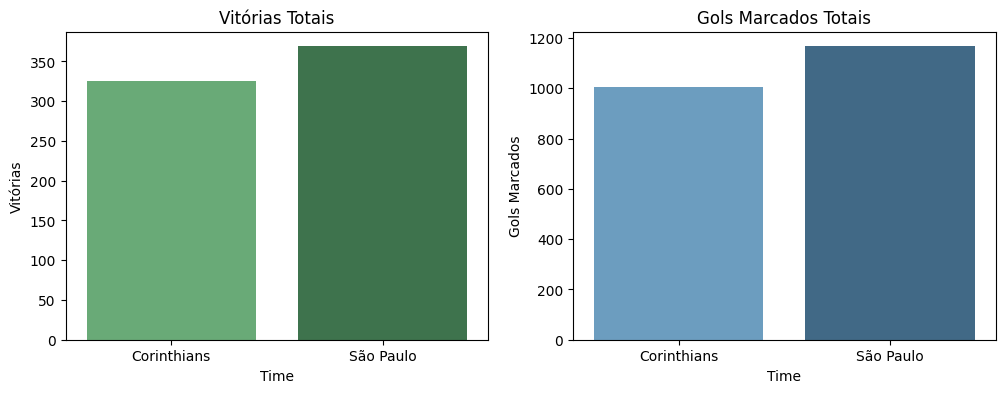

In [3]:
comparar_times("Flamengo", "Palmeiras")
comparar_times("Corinthians", "São Paulo")
